In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("SBUX.csv", index_col = "Date", parse_dates=True)

In [5]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-11,86.260002,86.870003,85.849998,86.589996,84.480545,4921900
2019-12-12,88.000000,88.889999,87.540001,88.209999,86.061089,10282100
2019-12-13,88.019997,88.790001,87.580002,88.669998,86.509880,6714100
2019-12-16,89.139999,89.300003,88.430000,88.779999,86.617203,6705600
2019-12-17,88.870003,88.970001,87.470001,88.129997,85.983040,7296900
...,...,...,...,...,...,...
2020-12-04,101.349998,102.940002,101.070000,102.279999,101.846405,6952700
2020-12-07,102.010002,102.220001,100.690002,101.410004,100.980103,4514800
2020-12-08,100.370003,101.570000,100.010002,101.209999,100.780945,3911300


<AxesSubplot:title={'center':'StarBucks Stock'}, xlabel='Date'>

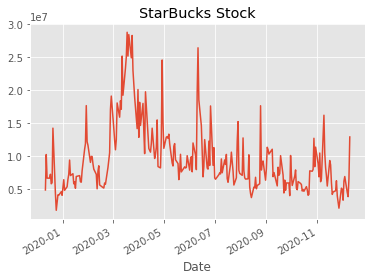

In [9]:
plt.style.use("ggplot")
df["Volume"].plot(label="Close", title="StarBucks Stock")

In [10]:
X = df.iloc[:, :-1]
y = df.iloc[:, 5:6] 

In [11]:
X

,Open,High,Low,Close,Adj Close
Date,,,,,
2019-12-11,86.260002,86.870003,85.849998,86.589996,84.480545
2019-12-12,88.000000,88.889999,87.540001,88.209999,86.061089
2019-12-13,88.019997,88.790001,87.580002,88.669998,86.509880
2019-12-16,89.139999,89.300003,88.430000,88.779999,86.617203
2019-12-17,88.870003,88.970001,87.470001,88.129997,85.983040
...,...,...,...,...,...
2020-12-04,101.349998,102.940002,101.070000,102.279999,101.846405
2020-12-07,102.010002,102.220001,100.690002,101.410004,100.980103
2020-12-08,100.370003,101.570000,100.010002,101.209999,100.780945


In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
mm = MinMaxScaler()
ss = StandardScaler()


X_ss = ss.fit_transform(X)
y_mm = mm.fit_transform(y) 

In [14]:
X_train = X_ss[:200, :]
X_test = X_ss[200:, :]

y_train = y_mm[:200, :]
y_test = y_mm[200:, :] 

In [16]:
print("Training Shape", X_train.shape, y_train.shape)
print("Testing Shape", X_test.shape, y_test.shape) 

Training Shape (200, 5) (200, 1)
Testing Shape (53, 5) (53, 1)


In [17]:
X_train[0]

array([0.46501033, 0.43644414, 0.51542403, 0.49614696, 0.39551654])

In [18]:
import torch #pytorch
import torch.nn as nn
from torch.autograd import Variable 

In [19]:
X_train_tensors = Variable(torch.Tensor(X_train))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test)) 

In [22]:
X_train_tensors_final = torch.reshape(X_train_tensors,   (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))
X_test_tensors_final = torch.reshape(X_test_tensors,  (X_test_tensors.shape[0], 1, X_test_tensors.shape[1])) 


In [23]:
X_train_tensors_final

tensor([[[ 0.4650,  0.4364,  0.5154,  0.4961,  0.3955]],

        [[ 0.6539,  0.6627,  0.6904,  0.6712,  0.5653]],

        [[ 0.6561,  0.6515,  0.6945,  0.7209,  0.6136]],

        [[ 0.7777,  0.7086,  0.7825,  0.7328,  0.6251]],

        [[ 0.7484,  0.6716,  0.6831,  0.6626,  0.5570]],

        [[ 0.6963,  0.6582,  0.7194,  0.6474,  0.5423]],

        [[ 0.6355,  0.6291,  0.6945,  0.7047,  0.5978]],

        [[ 0.7397,  0.6750,  0.7266,  0.6982,  0.5915]],

        [[ 0.7213,  0.6582,  0.7566,  0.6734,  0.5674]],

        [[ 0.6757,  0.6302,  0.7380,  0.7047,  0.5978]],

        [[ 0.7332,  0.6481,  0.7163,  0.6572,  0.5517]],

        [[ 0.6659,  0.6145,  0.7059,  0.6626,  0.5570]],

        [[ 0.6550,  0.5854,  0.6407,  0.5880,  0.4846]],

        [[ 0.5931,  0.5619,  0.6666,  0.6399,  0.5349]],

        [[ 0.6670,  0.7142,  0.7432,  0.7944,  0.6848]],

        [[ 0.7256,  0.6862,  0.7484,  0.7382,  0.6303]],

        [[ 0.6659,  0.6089,  0.6831,  0.6626,  0.5570]],

        [[ 0.6

In [24]:
class LSTM1(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTM1, self).__init__()
        self.num_classes = num_classes #number of classes
        self.num_layers = num_layers #number of layers
        self.input_size = input_size #input size
        self.hidden_size = hidden_size #hidden state
        self.seq_length = seq_length #sequence length

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, batch_first=True) #lstm
        self.fc_1 =  nn.Linear(hidden_size, 128) #fully connected 1
        self.fc = nn.Linear(128, num_classes) #fully connected last layer

        self.relu = nn.ReLU()
    
    def forward(self,x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #hidden state
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #internal state
        # Propagate input through LSTM
        output, (hn, cn) = self.lstm(x, (h_0, c_0)) #lstm with input, hidden, and internal state
        hn = hn.view(-1, self.hidden_size) #reshaping the data for Dense layer next
        out = self.relu(hn)
        out = self.fc_1(out) #first Dense
        out = self.relu(out) #relu
        out = self.fc(out) #Final Output
        return out

In [25]:
num_epochs = 1000 #1000 epochs
learning_rate = 0.001 #0.001 lr

input_size = 5 #number of features
hidden_size = 2 #number of features in hidden state
num_layers = 1 #number of stacked lstm layers

num_classes = 1 #number of output classes 